<a href="https://colab.research.google.com/github/TopStrikr/Network-Intrusion/blob/main/networkintrusion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
network_intrusion_df = pd.read_csv('/content/intern.csv')

# Perform an initial inspection
print(network_intrusion_df.head())
print(network_intrusion_df.dtypes)

   feature1 feature2 feature3 feature4  feature5  feature6  feature7  \
0         0      tcp     http       SF       239       486         0   
1         0      tcp     http       SF       235      1337         0   
2         0      tcp     http       SF       219      1337         0   
3         0      tcp     http       SF       217      2032         0   
4         0      tcp     http       SF       217      2032         0   

   feature8  feature9  feature10  ...  feature40  feature41  feature42  \
0         0         0          0  ...        0.0        0.0    normal.   
1         0         0          0  ...        0.0        0.0    normal.   
2         0         0          0  ...        0.0        0.0    normal.   
3         0         0          0  ...        0.0        0.0    normal.   
4         0         0          0  ...        0.0        0.0    normal.   

   feature23_log  feature25_log  feature26_log  feature29_log  feature30_log  \
0       2.197225            0.0           

In [ ]:
# Calculate the correlation matrix
# Note: We only calculate the correlation for numerical features
numerical_features = network_intrusion_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

               feature1  feature5  feature6  feature7  feature8  feature9  \
feature1       1.000000  0.007199  0.009190 -0.000391 -0.002018  0.006380   
feature5       0.007199  1.000000 -0.000088 -0.000038 -0.000193 -0.000014   
feature6       0.009190 -0.000088  1.000000 -0.000346 -0.001786  0.016582   
feature7      -0.000391 -0.000038 -0.000346  1.000000 -0.000444 -0.000038   
feature8      -0.002018 -0.000193 -0.001786 -0.000444  1.000000 -0.000195   
feature9       0.006380 -0.000014  0.016582 -0.000038 -0.000195  1.000000   
feature10      0.024682  0.004496  0.002941 -0.000617 -0.003185  0.000218   
feature11      0.007961 -0.000061  0.050367 -0.000142 -0.000734  0.142570   
feature12     -0.010353  0.000591  0.036403 -0.006305 -0.032553  0.005981   
feature13      0.084072  0.000141  0.019156 -0.000090 -0.000464  0.020103   
feature14      0.029222 -0.000052  0.034866 -0.000132 -0.000681  0.040771   
feature15      0.073628 -0.000022  0.085184 -0.000059 -0.000306 -0.000026   

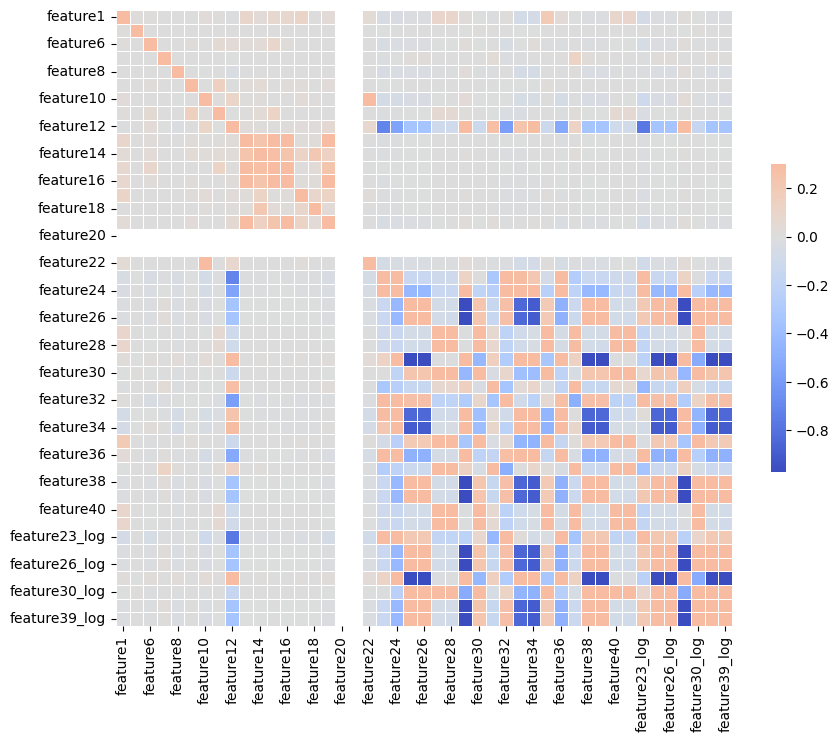

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=None, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
# Identify pairs of highly correlated features
high_corr_threshold = 0.7
highly_correlated_pairs = correlation_matrix.where(
    (abs(correlation_matrix) > high_corr_threshold) & (correlation_matrix != 1)
).stack().reset_index()
highly_correlated_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Display the pairs
print(highly_correlated_pairs)

          Feature1       Feature2  Correlation
0        feature10      feature22     0.856246
1        feature12      feature23    -0.714222
2        feature12  feature23_log    -0.772366
3        feature13      feature15     0.701314
4        feature13      feature16     0.991106
..             ...            ...          ...
161  feature39_log      feature39     0.999991
162  feature39_log  feature25_log     0.996480
163  feature39_log  feature26_log     0.998771
164  feature39_log  feature29_log    -0.968231
165  feature39_log  feature38_log     0.996501

[166 rows x 3 columns]


In [ ]:
# Remove one feature from each pair of highly correlated features
features_to_remove = highly_correlated_pairs['Feature1'].unique()
network_intrusion_df_reduced = network_intrusion_df.drop(columns=features_to_remove)

# Display the shape of the new dataframe
print('Original dataframe shape:', network_intrusion_df.shape)
print('Reduced dataframe shape:', network_intrusion_df_reduced.shape)

# Show the head of the reduced dataframe
print(network_intrusion_df_reduced.head())

Original dataframe shape: (197601, 49)
Reduced dataframe shape: (197601, 21)
   feature1 feature2 feature3 feature4  feature5  feature6  feature7  \
0         0      tcp     http       SF       239       486         0   
1         0      tcp     http       SF       235      1337         0   
2         0      tcp     http       SF       219      1337         0   
3         0      tcp     http       SF       217      2032         0   
4         0      tcp     http       SF       217      2032         0   

   feature8  feature9  feature11  ...  feature17  feature18  feature19  \
0         0         0          0  ...          0          0          0   
1         0         0          0  ...          0          0          0   
2         0         0          0  ...          0          0          0   
3         0         0          0  ...          0          0          0   
4         0         0          0  ...          0          0          0   

   feature20  feature21  feature31  feature32

In [ ]:
# Save the reduced dataframe to a CSV file
reduced_filename = 'network_intrusion_reduced.csv'
network_intrusion_df_reduced.to_csv(reduced_filename, index=False)

print('The reduced dataset has been saved as:', reduced_filename)

The reduced dataset has been saved as: network_intrusion_reduced.csv


In [ ]:
# Identify categorical features
# Assuming categorical features are of type 'object'
categorical_features = network_intrusion_df_reduced.select_dtypes(include=['object']).columns.tolist()

# Print the categorical features
print('Categorical features:', categorical_features)

Categorical features: ['feature2', 'feature3', 'feature4', 'feature42']


In [ ]:
# Display unique values for each categorical feature to understand their context
for feature in categorical_features:
    unique_values = network_intrusion_df_reduced[feature].unique()
    print(f'Unique values for {feature}:', unique_values)

Unique values for feature2: ['tcp' 'udp' 'icmp']
Unique values for feature3: ['http' 'mtp' 'finger' 'domain' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'rje' 'time' 'link' 'remote_job'
 'gopher' 'ssh' 'name' 'whois' 'login' 'imap4' 'ctf' 'nntp' 'shell' 'IRC'
 'nnsp' 'exec' 'printer' 'efs' 'courier' 'uucp' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'csnet_ns' 'pop_2' 'sunrpc' 'netbios_ns'
 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50' 'ldap'
 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tim_i' 'red_i']
Unique values for feature4: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
Unique values for feature42: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.' nan]


In [ ]:
# Rename the categorical features with more descriptive names
renamed_features = {
    'feature2': 'protocol_type',
    'feature3': 'service',
    'feature4': 'connection_status',
    'feature42': 'attack_type'
}
network_intrusion_df_reduced.rename(columns=renamed_features, inplace=True)

# Display the head of the dataframe to confirm the changes
print(network_intrusion_df_reduced.head())

   feature1 protocol_type service connection_status  feature5  feature6  \
0         0           tcp    http                SF       239       486   
1         0           tcp    http                SF       235      1337   
2         0           tcp    http                SF       219      1337   
3         0           tcp    http                SF       217      2032   
4         0           tcp    http                SF       217      2032   

   feature7  feature8  feature9  feature11  ...  feature17  feature18  \
0         0         0         0          0  ...          0          0   
1         0         0         0          0  ...          0          0   
2         0         0         0          0  ...          0          0   
3         0         0         0          0  ...          0          0   
4         0         0         0          0  ...          0          0   

   feature19  feature20  feature21  feature31  feature32  feature35  \
0          0          0          0     

In [ ]:
network_intrusion_df_reduced

,feature1,protocol_type,service,connection_status,feature5,feature6,feature7,feature8,feature9,feature11,...,feature17,feature18,feature19,feature20,feature21,feature31,feature32,feature35,feature37,attack_type
0,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0.0,19,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0.0,29,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0.0,39,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0.0,49,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0.0,59,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197596,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0,0,0,0,0,0.0,255,0.0,0.0,smurf.
197597,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0,0,0,0,0,0.0,255,0.0,0.0,smurf.
197598,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0,0,0,0,0,0.0,255,0.0,0.0,smurf.
197599,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0,0,0,0,0,0.0,255,0.0,0.0,smurf.


In [ ]:
csv_file_path = 'intern2.csv'  # Change the file path as needed
network_intrusion_df_reduced.to_csv(csv_file_path, index=False)

In [ ]:
missing_values = network_intrusion_df_reduced.isnull().sum()  # Use isnull() or isna() to check for missing values

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
feature1             0
protocol_type        0
service              0
connection_status    0
feature5             0
feature6             0
feature7             0
feature8             0
feature9             0
feature11            0
feature14            0
feature17            0
feature18            0
feature19            0
feature20            0
feature21            0
feature31            0
feature32            0
feature35            0
feature37            0
attack_type          1
dtype: int64


In [ ]:
network_intrusion_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197601 entries, 0 to 197600
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   feature1           197601 non-null  int64  
 1   protocol_type      197601 non-null  object 
 2   service            197601 non-null  object 
 3   connection_status  197601 non-null  object 
 4   feature5           197601 non-null  int64  
 5   feature6           197601 non-null  int64  
 6   feature7           197601 non-null  int64  
 7   feature8           197601 non-null  int64  
 8   feature9           197601 non-null  int64  
 9   feature11          197601 non-null  int64  
 10  feature14          197601 non-null  int64  
 11  feature17          197601 non-null  int64  
 12  feature18          197601 non-null  int64  
 13  feature19          197601 non-null  int64  
 14  feature20          197601 non-null  int64  
 15  feature21          197601 non-null  int64  
 16  fe

In [ ]:
network_intrusion_df_reduced.drop(['feature1', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature11', 'feature14', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21'], axis=1, inplace=True)

In [ ]:
network_intrusion_df_reduced

,protocol_type,service,connection_status,feature31,feature32,feature35,feature37,attack_type
0,tcp,http,SF,0.0,19,0.0,0.0,normal.
1,tcp,http,SF,0.0,29,0.0,0.0,normal.
2,tcp,http,SF,0.0,39,0.0,0.0,normal.
3,tcp,http,SF,0.0,49,0.0,0.0,normal.
4,tcp,http,SF,0.0,59,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...
197596,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197597,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197598,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197599,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.


In [ ]:
# Assuming df is your DataFrame
df_without_missing = network_intrusion_df_reduced.dropna()


In [ ]:
df_without_missing

,protocol_type,service,connection_status,feature31,feature32,feature35,feature37,attack_type
0,tcp,http,SF,0.0,19,0.0,0.0,normal.
1,tcp,http,SF,0.0,29,0.0,0.0,normal.
2,tcp,http,SF,0.0,39,0.0,0.0,normal.
3,tcp,http,SF,0.0,49,0.0,0.0,normal.
4,tcp,http,SF,0.0,59,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...
197595,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197596,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197597,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.
197598,icmp,ecr_i,SF,0.0,255,0.0,0.0,smurf.


In [ ]:
csv_file_path = 'intern3.csv'  # Change the file path as needed
df_without_missing.to_csv(csv_file_path, index=False)

In [ ]:
attack_dict = {
    0: 'dos',
    1: 'u2r',
    2: 'r2l',
    3: 'r2l',
    4: 'r2l',
    5: 'probe',
    6: 'dos',
    7: 'u2r',
    8: 'r2l',
    9: 'dos',
    10: 'probe',
    11: 'u2r',
    12: 'r2l',
    13: 'dos',
    14: 'probe',
    15: 'u2r',
    16: 'probe',
    17: 'dos',
    18: 'r2l',
    19: 'dos',
    20: 'r2l',
    21: 'r2l'
}


In [ ]:
cols ="""duration,
..........,
.........,
"""


columns =[]
for c in cols.split(', '):
	if(c.strip()):
	  columns.append(c.strip())

columns.append('target')
print(len(columns))

3
